In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')



# Applying Textures

Plot a mesh with an image projected onto it as a texture.


In [2]:
import pyvista as pv
from pyvista import examples
import numpy as np
from matplotlib.cm import get_cmap

Texture mapping is easily implemented using PyVista. Many of the geometric
objects come preloaded with texture coordinates, so quickly creating a
surface and displaying an image is simply:



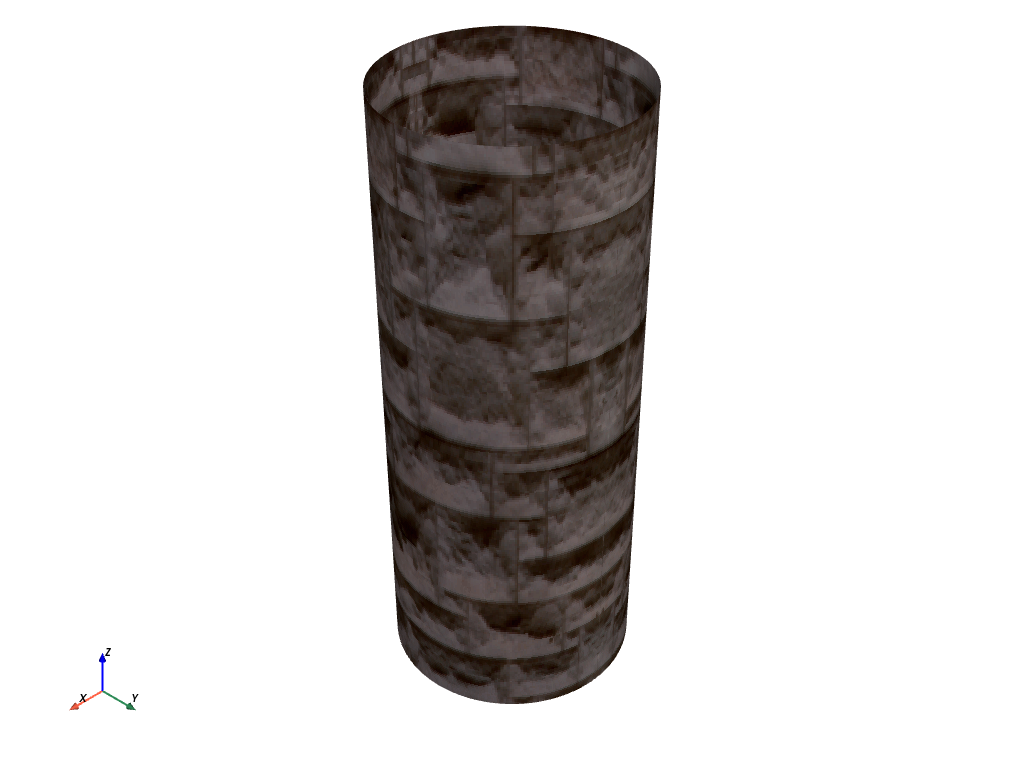

[(0.6407227105375181, 0.6407227105375181, 0.6407227105375181),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]

In [23]:
# load a sample texture
tex = pv.examples.download_masonry_texture()

# create a surface to host this texture
surf = pv.Cylinder(capping=False, direction=[0,0,1], radius=0.1, height=0.5)

surf.plot(texture=tex)

But what if your dataset doesn't have texture coordinates? Then you can
harness the :func:`pyvista.DataSetFilters.texture_map_to_plane` filter to
properly map an image to a dataset's surface.
For example, let's map that same image of bricks to a curvey surface:



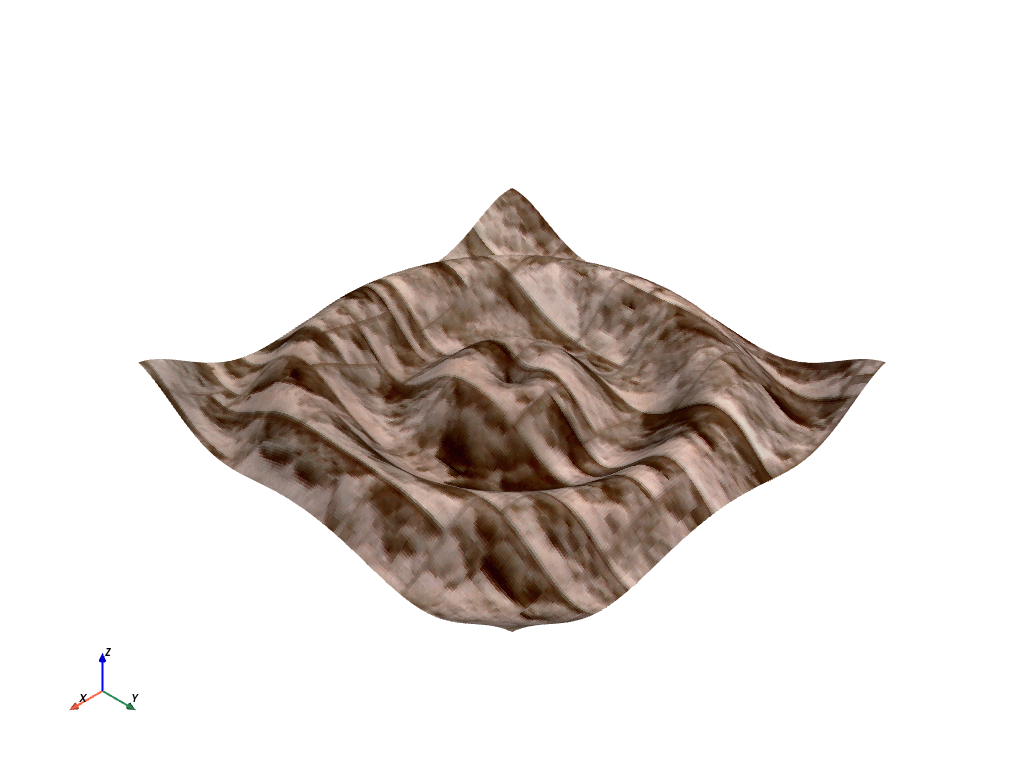

[(31.107430113485155, 31.107430113485155, 31.232431754442583),
 (-0.125, -0.125, 1.6409574268849703e-06),
 (0.0, 0.0, 1.0)]

In [4]:
# create a structured surface
x = np.arange(-10, 10, 0.25)
y = np.arange(-10, 10, 0.25)
x, y = np.meshgrid(x, y)
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r)
curvsurf = pv.StructuredGrid(x, y, z)

# Map the curved surface to a plane - use best fitting plane
curvsurf.texture_map_to_plane(inplace=True)

curvsurf.plot(texture=tex)

Display scalar data along with a texture by ensuring the
``interpolate_before_map`` setting is ``False`` and specifying both the
``texture`` and ``scalars`` arguments.



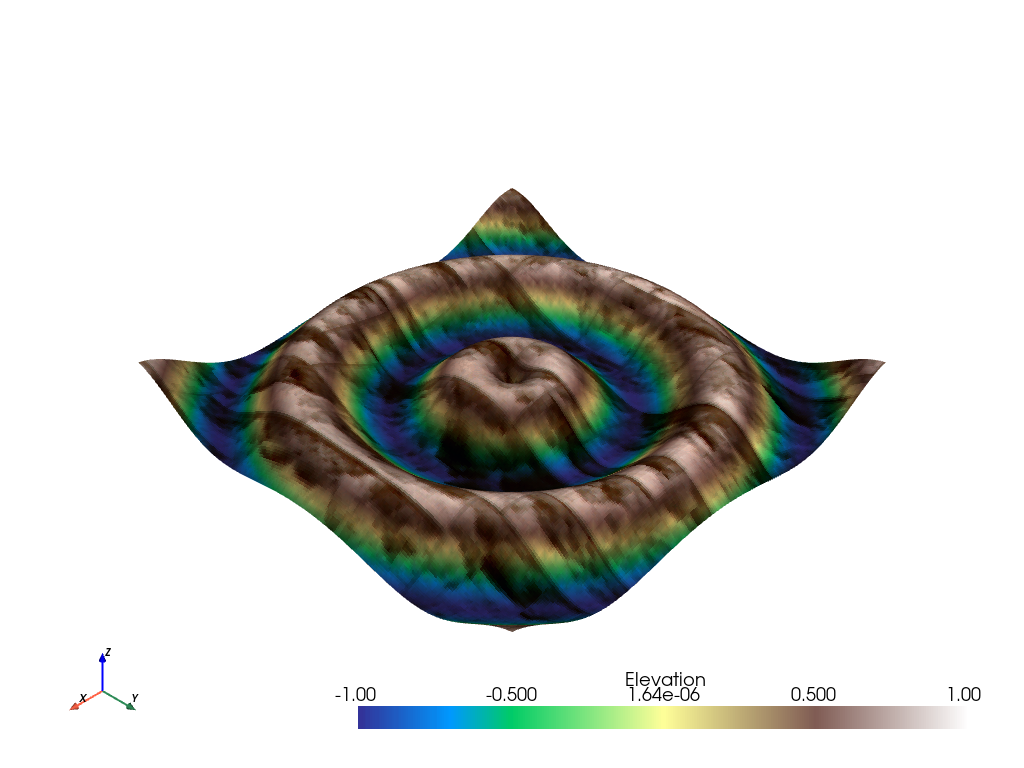

[(31.107430113485155, 31.107430113485155, 31.232431754442583),
 (-0.125, -0.125, 1.6409574268849703e-06),
 (0.0, 0.0, 1.0)]

In [5]:
elevated = curvsurf.elevation()

elevated.plot(scalars='Elevation',
              cmap='terrain',
              texture=tex,
              interpolate_before_map=False)

Note that this process can be completed with any image texture!



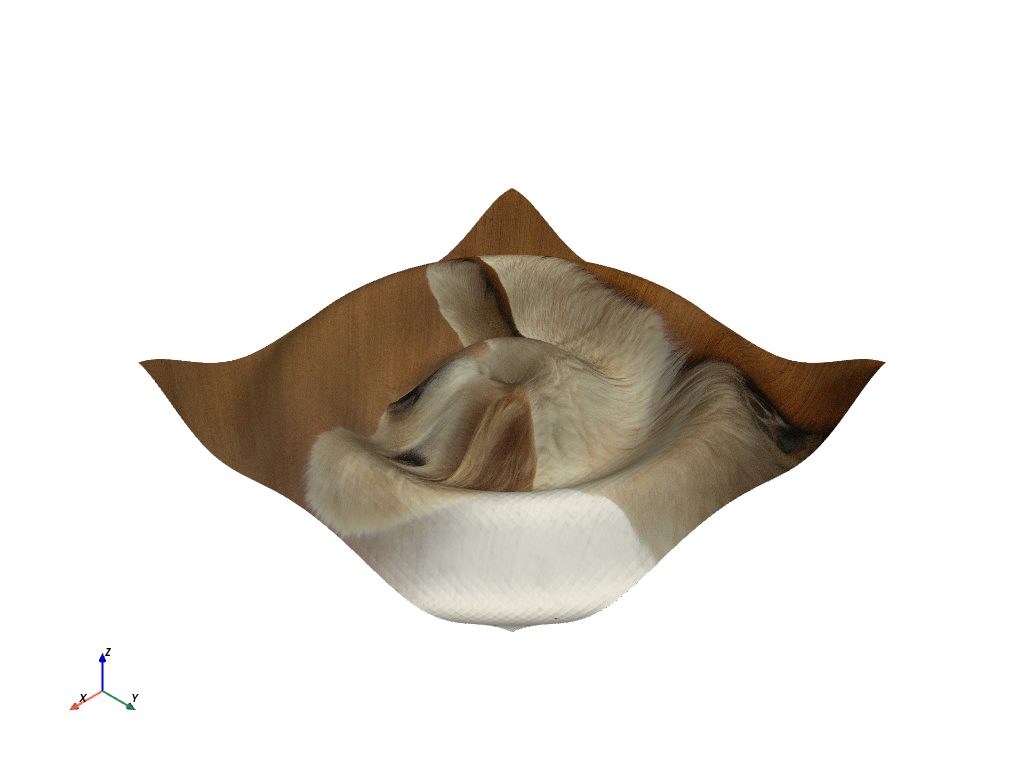

[(31.107430113485155, 31.107430113485155, 31.232431754442583),
 (-0.125, -0.125, 1.6409574268849703e-06),
 (0.0, 0.0, 1.0)]

In [6]:
# use the puppy image
tex = examples.download_puppy_texture()
curvsurf.plot(texture=tex)

## Textures from Files

What about loading your own texture from an image? This is often most easily
done using the :func:`pyvista.read_texture` function - simply pass an image
file's path, and this function with handle making a ``vtkTexture`` for you to
use.



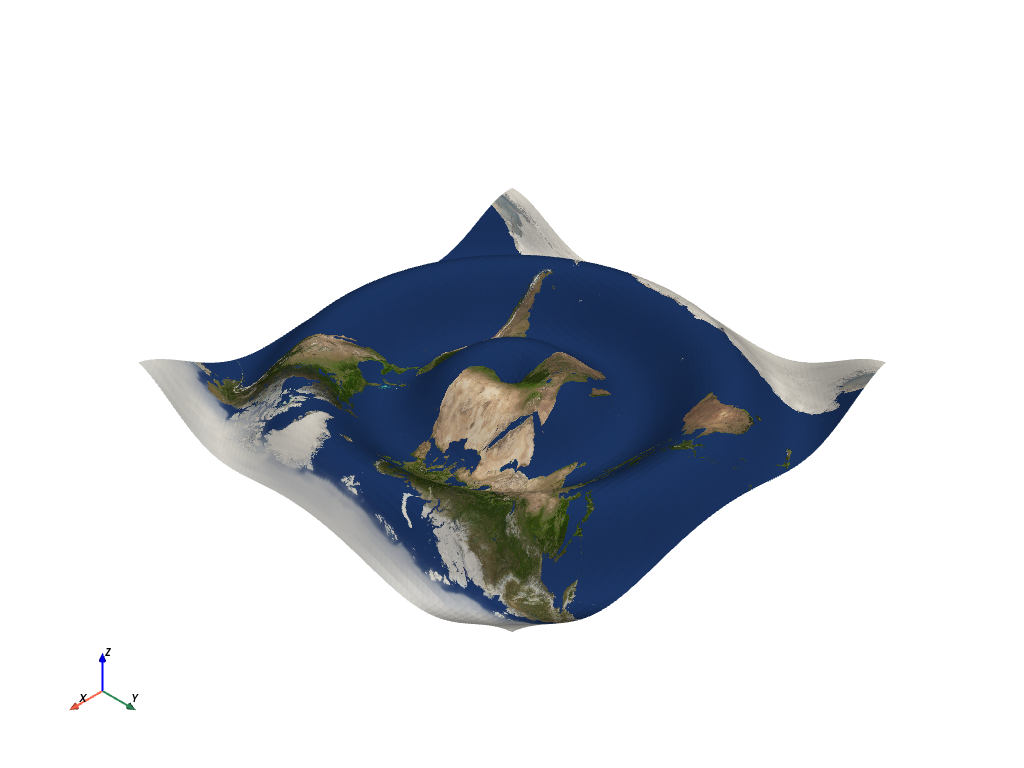

[(31.107430113485155, 31.107430113485155, 31.232431754442583),
 (-0.125, -0.125, 1.6409574268849703e-06),
 (0.0, 0.0, 1.0)]

In [7]:
image_file = examples.mapfile
tex = pv.read_texture(image_file)
curvsurf.plot(texture=tex)

## NumPy Arrays as Textures

Want to use a programmatically built image? :class:`pyvista.UniformGrid`
objects can be converted to textures using :func:`pyvista.image_to_texture`
and 3D NumPy (X by Y by RGB) arrays can be converted to textures using
:func:`pyvista.numpy_to_texture`.



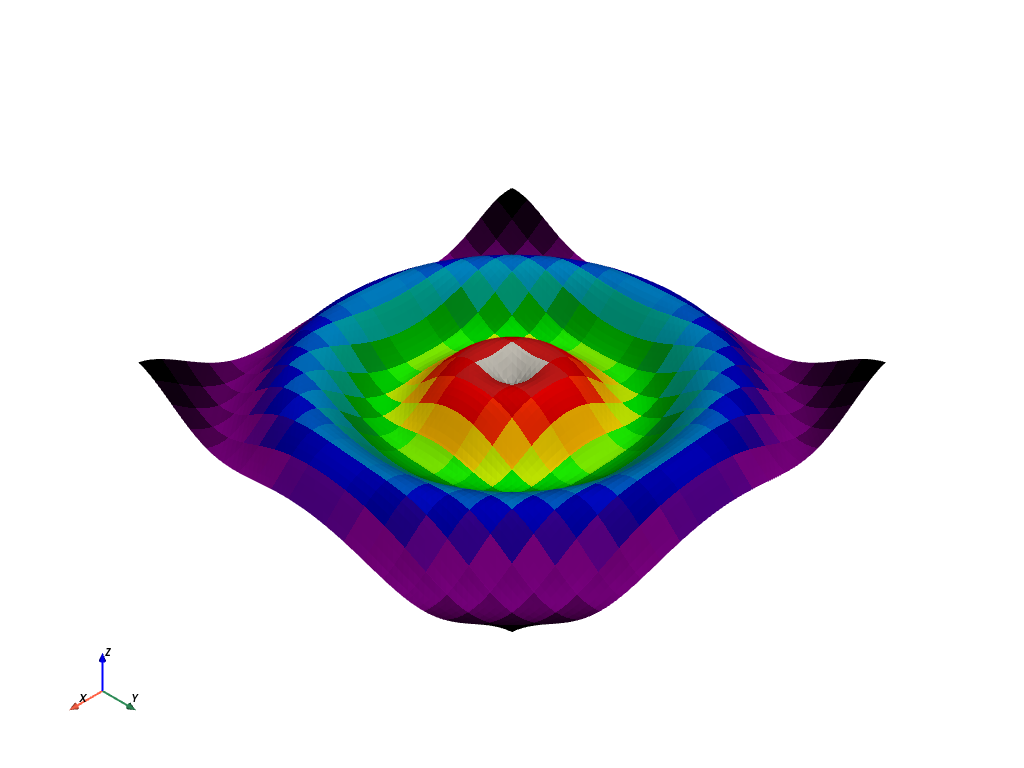

[(31.107430113485155, 31.107430113485155, 31.232431754442583),
 (-0.125, -0.125, 1.6409574268849703e-06),
 (0.0, 0.0, 1.0)]

In [8]:
# create an image using numpy,
xx, yy = np.meshgrid(np.linspace(-200, 200, 20), np.linspace(-200, 200, 20))
A, b = 500, 100
zz = A * np.exp(-0.5 * ((xx / b) ** 2.0 + (yy / b) ** 2.0))

# Creating a custom RGB image
cmap = get_cmap("nipy_spectral")
norm = lambda x: (x - np.nanmin(x)) / (np.nanmax(x) - np.nanmin(x))
hue = norm(zz.ravel())
colors = (cmap(hue)[:, 0:3] * 255.0).astype(np.uint8)
image = colors.reshape((xx.shape[0], xx.shape[1], 3), order="F")

# Convert 3D numpy array to texture
tex = pv.numpy_to_texture(image)

# Render it!
curvsurf.plot(texture=tex)

## Textures with Transparency

Textures can also specify per-pixel opacity values. The image must
contain a 4th channel specifying the opacity value from 0 [transparent] to
255 [fully visible]. To enable this feature just pass the opacity array as the
4th channel of the image as a 3 dimensional matrix with shape [nrows, ncols, 4]
:func:`pyvista.numpy_to_texture`.

Here we can download an image that has an alpha channel:



In [9]:
rgba = examples.download_rgba_texture()
rgba.n_components

4

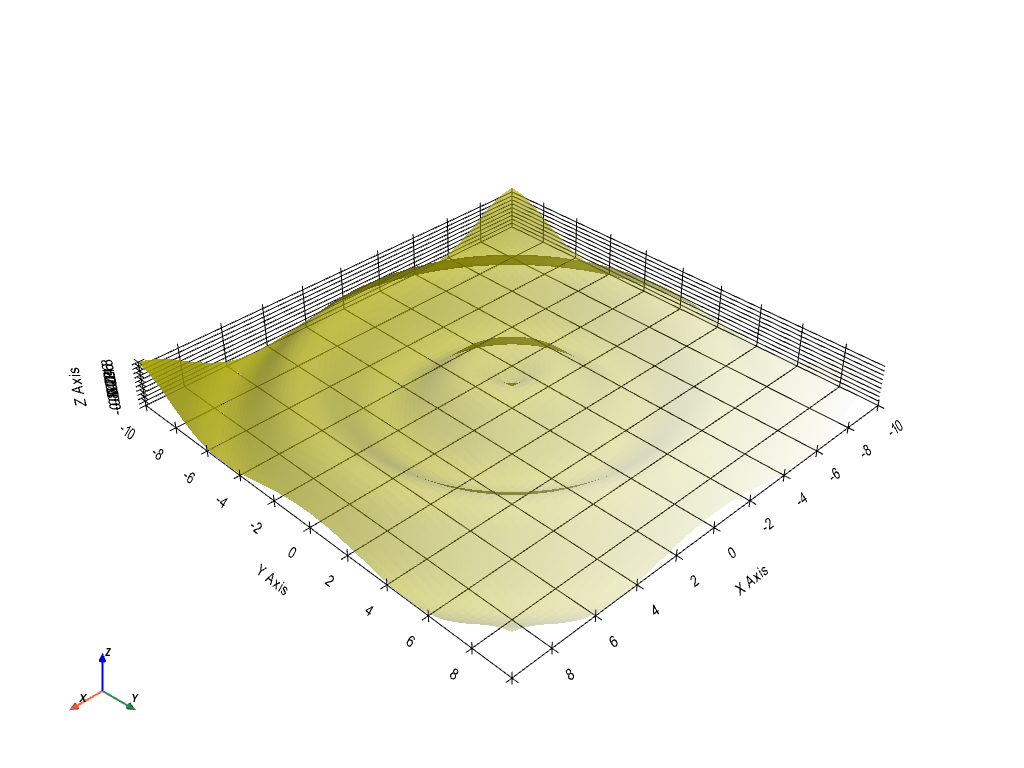

[(31.107430113485155, 31.107430113485155, 31.232431754442583),
 (-0.125, -0.125, 1.6409574268849703e-06),
 (0.0, 0.0, 1.0)]

In [10]:
# Render it!
curvsurf.plot(texture=rgba, show_grid=True)

## Repeating Textures

What if you have a single texture that you'd like to repeat across a mesh?
Simply define the texture coordinates for all nodes explicitly.

Here we create the texture coordinates to fill up the grid with several
mappings of a single texture. In order to do this we must define texture
coordinates outside of the typical ``(0, 1)`` range:



In [11]:
axial_num_puppies = 4
xc = np.linspace(0, axial_num_puppies, curvsurf.dimensions[0])
yc = np.linspace(0, axial_num_puppies, curvsurf.dimensions[1])

xxc, yyc = np.meshgrid(xc, yc)
puppy_coords = np.c_[yyc.ravel(), xxc.ravel()]

By defining texture coordinates that range ``(0, 4)`` on each axis, we will
produce 4 repetitions of the same texture on this mesh.

Then we must associate those texture coordinates with the mesh through the
:attr:`pyvista.Common.t_coords` property.



In [12]:
curvsurf.t_coords = puppy_coords

Now display all the puppies!



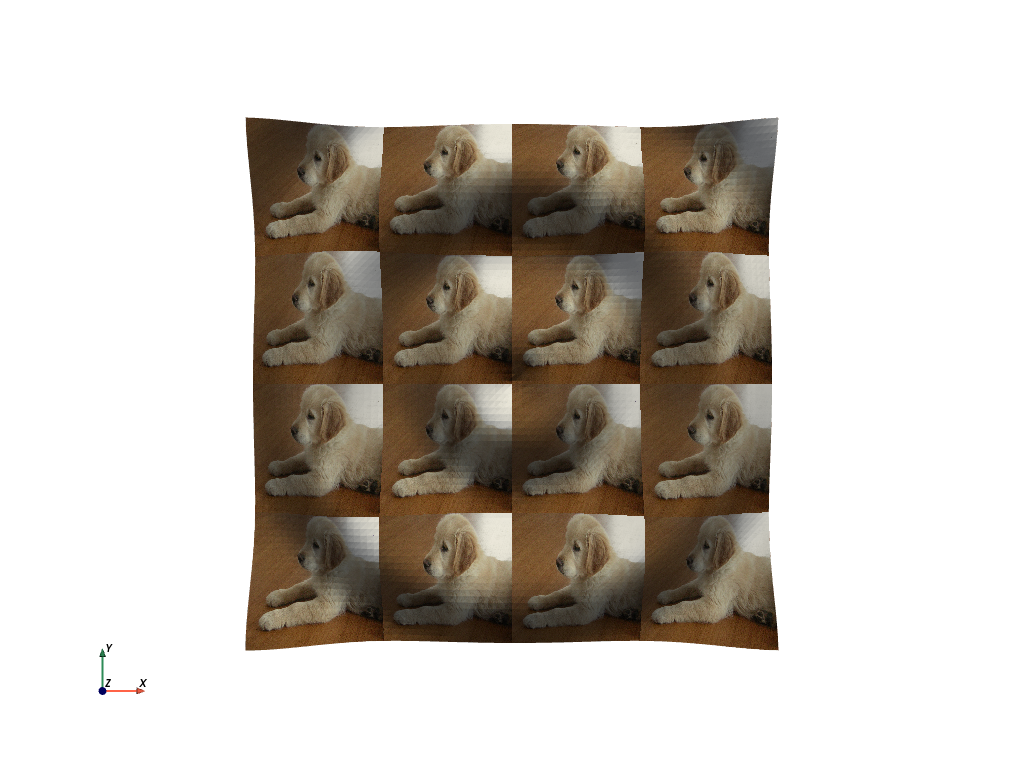

[(-0.125, -0.125, 54.0961574413579),
 (-0.125, -0.125, 1.6409574268849703e-06),
 (0.0, 1.0, 0.0)]

In [13]:
# use the puppy image
tex = examples.download_puppy_texture()
curvsurf.plot(texture=tex, cpos="xy")

## Spherical Texture Coordinates
We have a built in convienance method for mapping textures to spherical
coordinate systems much like the planar mapping demoed above.



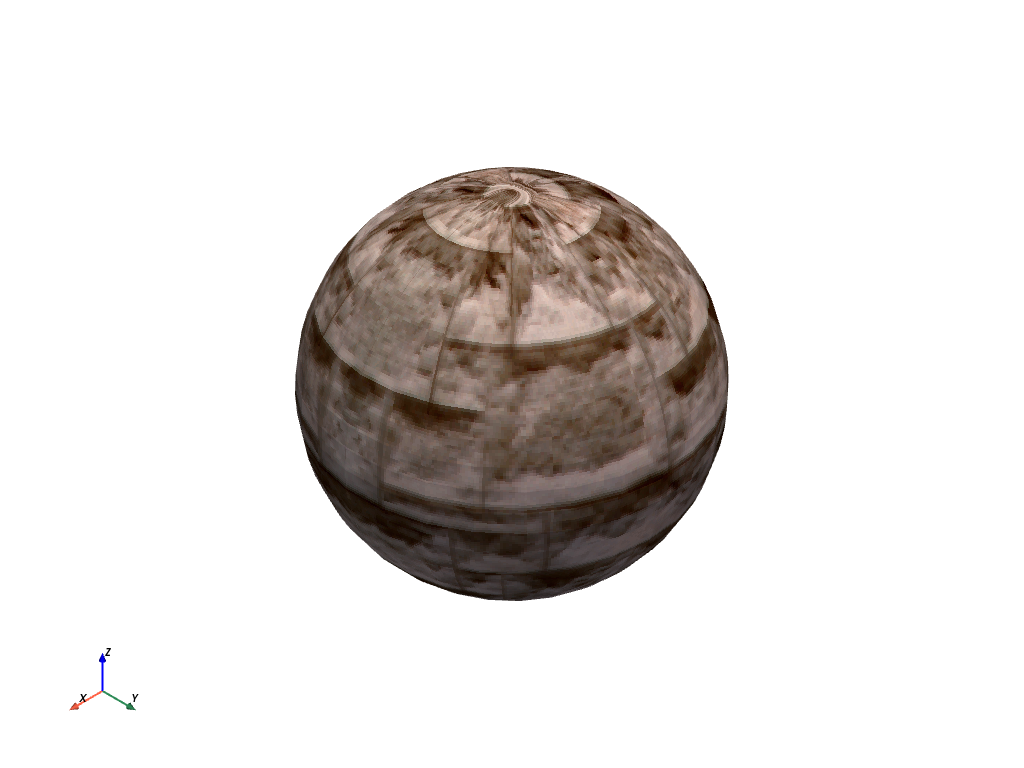

[(1.9264490110725325, 1.9264490110725325, 1.9264490110725325),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]

In [14]:
mesh = pv.Sphere()
tex = examples.download_masonry_texture()

mesh.texture_map_to_sphere(inplace=True)
mesh.plot(texture=tex)

The helper method above does not always produce the desired texture
coordinates, so sometimes it must be done manually. Here is a great, user
contributed example from `this support issue <https://github.com/pyvista/pyvista-support/issues/257>`_

Manually create the texture coordinates for a globe map. First, we create
the mesh that will be used as the globe. Note the `start_theta` for a slight
overlappig



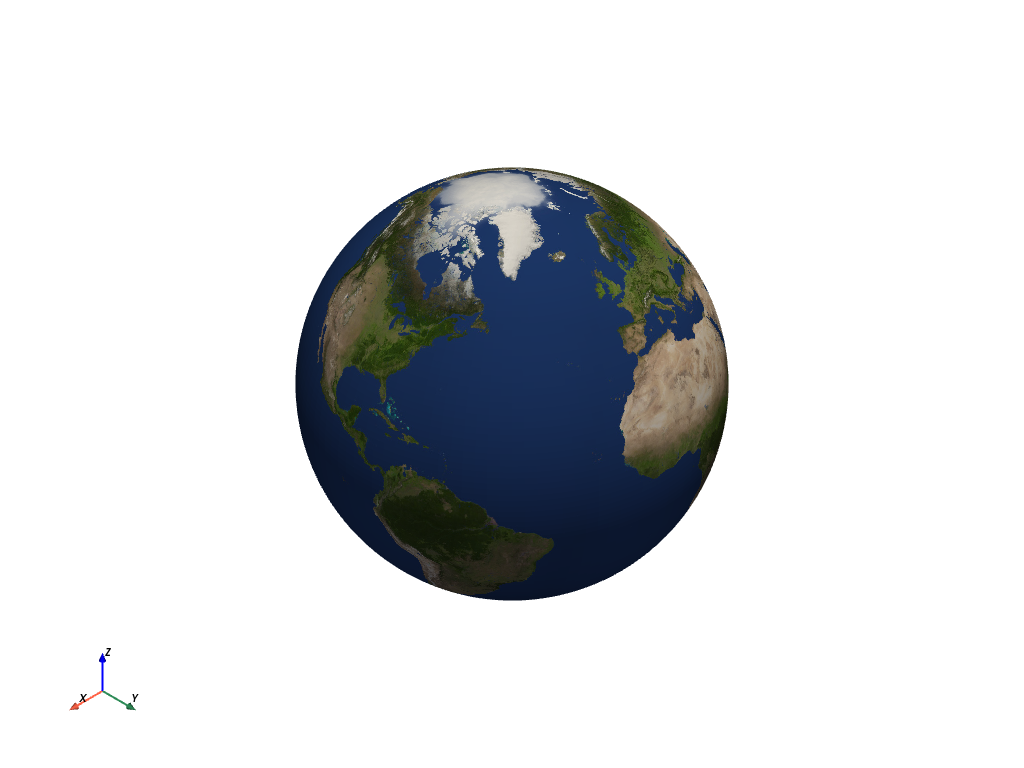

[(3.8634788478848945, 3.8634788478848945, 3.8634788478848945),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]

In [15]:
sphere = pv.Sphere(radius=1,
                   theta_resolution=120,
                   phi_resolution=120,
                   start_theta=270.001,
                   end_theta=270)

# Initialize the texture coordinates array
sphere.t_coords = np.zeros((sphere.points.shape[0], 2))

# Populate by manually calculating
for i in range(sphere.points.shape[0]):
    sphere.t_coords[i] = [0.5 + np.arctan2(-sphere.points[i, 0],
                                           sphere.points[i, 1])/(2 * np.pi),
                          0.5 + np.arcsin(sphere.points[i, 2])/np.pi]

# And let's display it with a world map
tex = examples.load_globe_texture()
sphere.plot(texture=tex)